# Exploratory Data Analysis for an Online Retail Data

## Step 1: Importing necessary Libraries

In [1]:
# import pytho modules for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Step 2: Loading the Dataset.
* We use the [online_retail_data_without_null_values.csv](https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Python-Modules-for-Data-Analysis/Pandas-Module/How-to-Handle-Missing-Data-in-Pandas-DataFrame/online_retail_data_without_null_values.csv) dataset which was generated after removing raws with Null values from [Online Retail Store](https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Datasets/Online_Retail.csv) dataset.

In [2]:
url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Python-Modules-for-Data-Analysis/Pandas-Module/How-to-Filter-Pandas-DataFrame/online_retail_data_without_negative_qty_values.csv"
online_retail_data = pd.read_csv(url, encoding= 'unicode_escape', parse_dates=['InvoiceDate'])

# check shape of the data
online_retail_data.shape

(397924, 8)

## Step 3: Viewing the dataset.

Previewing the Dataset

In [3]:
online_retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Additional Columns
* Add some extra columns from the preview above.
  
  1. Add __TotalAmount = Quantity * UnitPrice__
  2. Add __Date__ extracted from __InvoiceDate__ datetime column
  3. Add __MonthYear__ extracted from __InvoiceDate__ datetime column

In [6]:
# add TotalAmount Column
online_retail_data['TotalAmount'] = online_retail_data['Quantity'] * online_retail_data['UnitPrice']

# add Date Column
online_retail_data['Date'] = online_retail_data['InvoiceDate'].dt.date

# add MonthYear Column
online_retail_data['MonthYear'] = online_retail_data['InvoiceDate'].dt.to_period('M')

# add Week Start's Date - week starts on Monday
online_retail_data['Week'] = online_retail_data['InvoiceDate'].dt.to_period('W').dt.start_time

In [7]:
online_retail_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date,MonthYear,Week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12,2010-11-29
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12,2010-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12,2010-11-29


#### Getting Columns names

In [8]:
online_retail_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount', 'Date',
       'MonthYear', 'Week'],
      dtype='object')

#### Getting Concise info of dataset

In [9]:
# Basic Information about the data
online_retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalAmount  397924 non-null  float64       
 9   Date         397924 non-null  object        
 10  MonthYear    397924 non-null  period[M]     
 11  Week         397924 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(2), object(4), period[M](1)
memory usage: 36.4+ MB


#### Check the columns Data Types

In [10]:
online_retail_data.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
TotalAmount           float64
Date                   object
MonthYear           period[M]
Week           datetime64[ns]
dtype: object

### Change the CustomerID column from float64 to object

In [11]:
## using dictionary to convert specific columns
convert_dic = {
    'CustomerID': str
}
online_retail_data = online_retail_data.astype(convert_dic)

#### Getting the Descriptive statistics.

In [12]:
# Describe the data - descriptive statistics
online_retail_data.describe(include='all', datetime_is_numeric=True)
# Specifying datetime_is_numeric=True adopts the future behavior of Treating datetime data as categorical rather than numeric in `.describe

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Date,MonthYear,Week
count,397924.000000,397924,397924,397924.000000,397924,397924.000000,397924,397924,397924.000000,397924,397924,397924
unique,NaN,3665,3877,NaN,NaN,NaN,4339,37,NaN,305,13,NaN
top,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841.0,United Kingdom,NaN,2011-11-06,2011-11,NaN
freq,NaN,2035,2028,NaN,NaN,NaN,7847,354345,NaN,3423,64545,NaN
mean,560617.126645,NaN,NaN,13.021823,2011-07-10 23:43:36.912475648,3.116174,NaN,NaN,22.394749,NaN,NaN,2011-07-07 19:44:33.230064384
min,536365.000000,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,NaN,NaN,0.000000,NaN,NaN,2010-11-29 00:00:00
25%,549234.000000,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,NaN,NaN,4.680000,NaN,NaN,2011-04-04 00:00:00
50%,561893.000000,NaN,NaN,6.000000,2011-07-31 14:39:00,1.950000,NaN,NaN,11.800000,NaN,NaN,2011-07-25 00:00:00
75%,572090.000000,NaN,NaN,12.000000,2011-10-20 14:33:00,3.750000,NaN,NaN,19.800000,NaN,NaN,2011-10-17 00:00:00
max,581587.000000,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,NaN,NaN,168469.600000,NaN,NaN,2011-12-05 00:00:00


### Insights
1. There are 397,924 Item Level transactions in the dataset
2. 4,339 Unique Customers Invoiced.
3. 37 Countries

#### Checking Duplicates
* The pandas.DataFrame.duplicated.sum() function returns a Series or DataFrame containing the sum of the boolean values (True or False) in the duplicate rows of the DataFrame.

In [13]:
online_retail_data.duplicated().sum()

5192

### Checking Unique Values

In [14]:
# unique values of Country
print(online_retail_data['Country'].nunique())
online_retail_data['Country'].unique()

37


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

## Grouping the DataFrame & Visualization
* We group the dataframe and generate the following visuals:
  * Boxplot to show any outliers for the numerical values

#### Grouping Data 1: Group By CustomerID By Day
* We use the output of this GropuBy to calculate:
  * Monthly Cohort Retention
  * Weekly Cohort Retention
  * RFM Analysis, and
  * Customer Segmentation using K-Means Clustering

In [24]:
# group the data using CustomerID, Date and Country
grouped_daily_customer_df = online_retail_data.groupby(
    ['CustomerID', 'Date', 'Country', 'MonthYear', 'Week']).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    CountOfUniqueInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique')
).reset_index()

# save results in a csv file
grouped_daily_customer_df.to_csv("grouped_daily_customer_data.csv", date_format='%Y-%m-%d', index=False)

# preview
grouped_daily_customer_df.head()

,CustomerID,Date,Country,MonthYear,Week,TotalAmount,CountOfUniqueInvoices
0,12346.0,2011-01-18,United Kingdom,2011-01,2011-01-17,77183.60,1
1,12347.0,2010-12-07,Iceland,2010-12,2010-12-06,711.79,1
2,12347.0,2011-01-26,Iceland,2011-01,2011-01-24,475.39,1
3,12347.0,2011-04-07,Iceland,2011-04,2011-04-04,636.25,1
4,12347.0,2011-06-09,Iceland,2011-06,2011-06-06,382.52,1


* From the above result of groupby, we can easily check for outliers from TotalAmount column.

<Axes: >

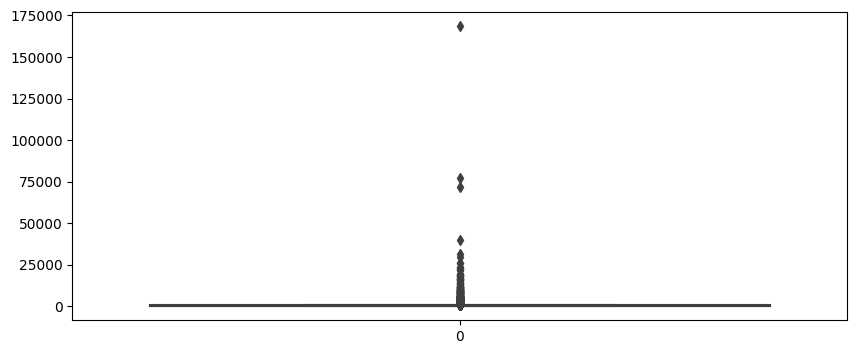

In [31]:
fig, ax = plt.subplots(figsize = (10, 4))
sns.boxplot(grouped_daily_customer_df['TotalAmount'])

#### Grouping Data 2: Group Data By Country
* __Goals__:
  * Calculate __Average Sales Value__ by Country.

In [25]:
# group the data by country and understand the summary data by Country
grouped_country_df = online_retail_data.groupby( 'Country').agg(
    CountOfUniqueCustomers = pd.NamedAgg(column = 'CustomerID', aggfunc = 'nunique'),
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    CountOfUniqueInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique')
).reset_index()

# calculate the Average Basket Value 
grouped_country_df['AverageSalesValue'] = grouped_country_df['TotalAmount'] / grouped_country_df['CountOfUniqueCustomers']

# save the output in a csv file
grouped_country_df.to_csv("grouped_country_data.csv", index=False)

# preview
grouped_country_df.head()

,Country,CountOfUniqueCustomers,TotalAmount,CountOfUniqueInvoices,AverageSalesValue
0,Australia,9,138521.31,57,15391.256667
1,Austria,11,10198.68,17,927.152727
2,Bahrain,2,548.40,2,274.200000
3,Belgium,25,41196.34,98,1647.853600
4,Brazil,1,1143.60,1,1143.600000


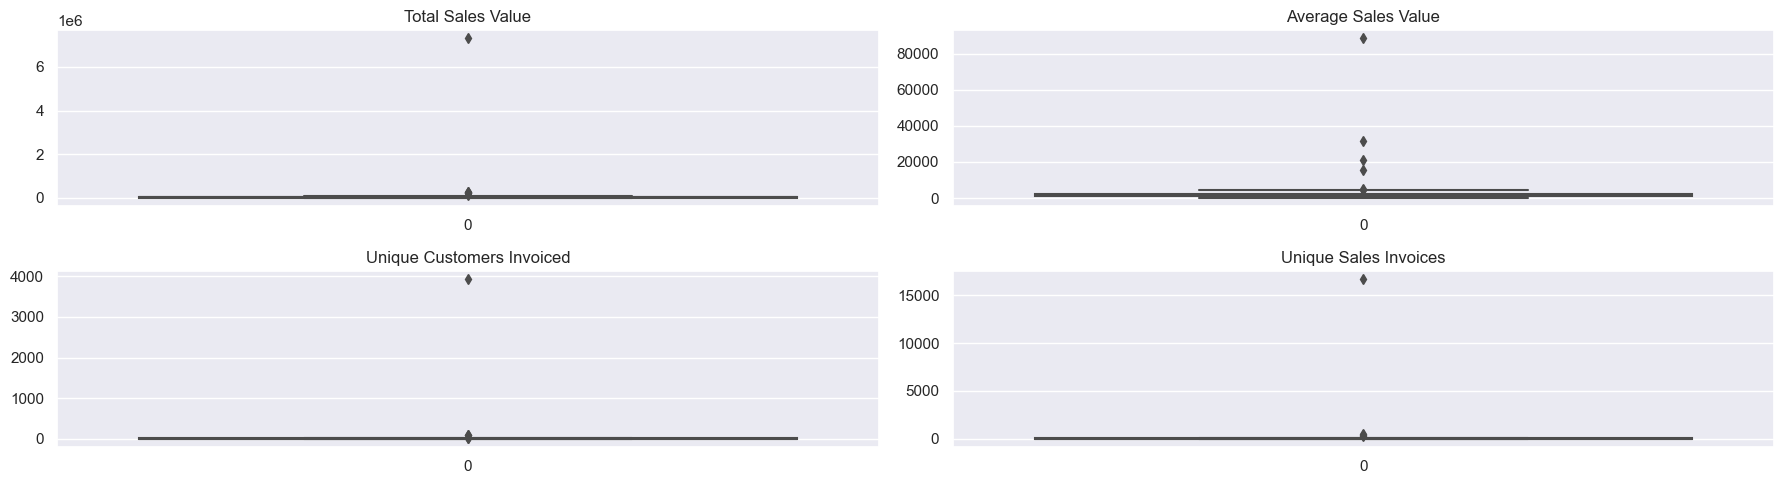

In [37]:
#set seaborn plotting aesthetics as default
sns.set()
# Define the Subplots
fig, ax = plt.subplots(2,2, figsize = (18, 5))

# Total Amount
sns.boxplot(grouped_country_df['TotalAmount'], ax = ax[0, 0]).set(title="Total Sales Value")
# Average Sales Value
sns.boxplot(grouped_country_df['AverageSalesValue'], ax = ax[0,1]).set(title="Average Sales Value")
# Unique Customers
sns.boxplot(grouped_country_df['CountOfUniqueCustomers'], ax = ax[1, 0]).set(title="Unique Customers Invoiced")
# Unique Invoices
sns.boxplot(grouped_country_df['CountOfUniqueInvoices'], ax = ax[1,1]).set(title="Unique Sales Invoices")

plt.tight_layout()

#### Bivariate Analysis
1. Check for liner relationships between the 2 variables.

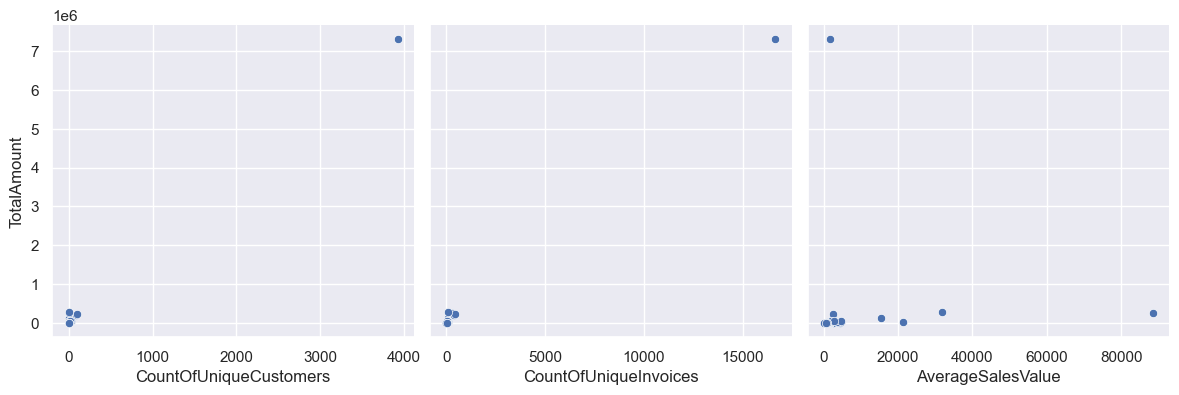

In [40]:
data = grouped_country_df.set_index('Country')

sns.pairplot(data, 
             x_vars=['CountOfUniqueCustomers', 'CountOfUniqueInvoices', 'AverageSalesValue'],
             y_vars=['TotalAmount'],
             height=4,
             aspect=1,
             kind='scatter'
             )

#### Multivariate Analysis:
1. Check for any correlations between the four variables.

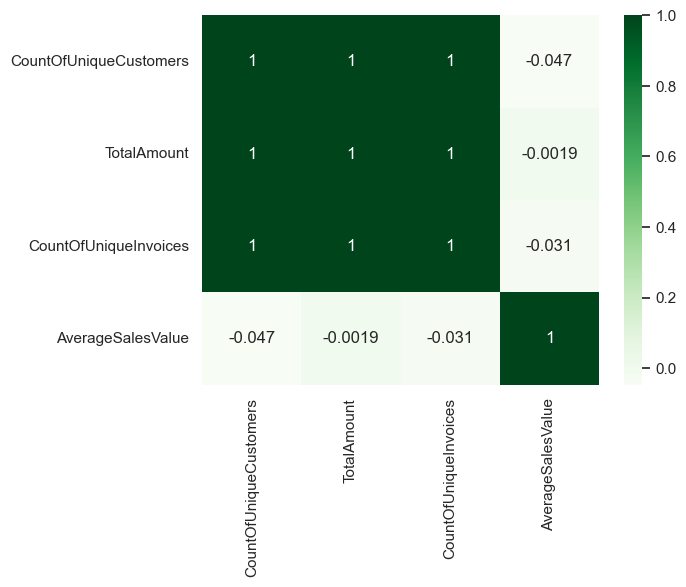

In [38]:
# check fo correlations
data = grouped_country_df.set_index('Country')

sns.heatmap(data.corr(), cmap='Greens', annot=True)
plt.show()

### Grouping Data 3: Group Data By Country By Day

In [27]:
# group the data By Country, By Date
grouped_daily_country_df = online_retail_data.groupby(
    ['Date','Week', 'Country', 'MonthYear']).agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
    CountOfUniqueInvoices = pd.NamedAgg(column='InvoiceNo', aggfunc='nunique'),
    CountOfUniqueCustomers = pd.NamedAgg(column='CustomerID', aggfunc='nunique')
).reset_index()

# save results in a csv file
grouped_daily_country_df.to_csv("grouped_daily_country_df.csv", date_format='%Y-%m-%d', index=False)

# preview
grouped_daily_country_df.head()

,Date,Week,Country,MonthYear,TotalAmount,CountOfUniqueInvoices,CountOfUniqueCustomers
0,2010-12-01,2010-11-29,Australia,2010-12,358.25,1,1
1,2010-12-01,2010-11-29,EIRE,2010-12,555.38,2,1
2,2010-12-01,2010-11-29,France,2010-12,855.86,1,1
3,2010-12-01,2010-11-29,Germany,2010-12,261.48,1,1
4,2010-12-01,2010-11-29,Netherlands,2010-12,192.60,1,1
